# Analyze Spotify Daily Mix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import os

In [2]:
# secret keys
os.environ['SPOTIPY_CLIENT_ID'] = ''
os.environ['SPOTIPY_CLIENT_SECRET'] = ''
os.environ['SPOTIPY_REDIRECT_URI'] = ''

In [36]:
# create engine

scope = "user-read-recently-played"
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))

## Fetch songs from Daily Mix playlists

In [1]:
# define function to fetch songs in a playlist

def fetch_daily_mix(id):
    """
    Fetch all tracks information from a Spotify playlist.
    
    Args:
        id(str): The playlist ID. It accepts URL, URI, and ID format.

    Returns:
        (pandas dataframe): The dataframe with the tracks information.
    """
    
    result = sp.playlist(id)

    track_id = []
    track_name = []
    track_duration_ms = []
    artist_id = []
    artist_name = []
    album_id = []
    album_name = []
    album_release_date = []

    for item in result['tracks']['items']:
        track = item['track']
        track_id.append(track['id'])
        track_name.append(track['name'])
        track_duration_ms.append(track['duration_ms'])

        artist = track['artists'][0]
        artist_id.append(artist['id'])
        artist_name.append(artist['name'])

        album = track['album']
        album_id.append(album['id'])
        album_name.append(album['name'])
        album_release_date.append(album['release_date'])

    df = pd.DataFrame({
        'track_id': track_id,
        'track_name': track_name,
        'track_duration_ms': track_duration_ms,
        'artist_id': artist_id,
        'artist_name': artist_name,
        'album_id': album_id,
        'album_name': album_name,
        'album_release_date': album_release_date
    })

    return df

In [43]:
mix_1 = fetch_daily_mix('https://open.spotify.com/playlist/37i9dQZF1E3691U40dwOpl?si=0756f72aec774d28')
mix_1.head()

,track_id,track_name,track_duration_ms,artist_id,artist_name,album_id,album_name,album_release_date
0,1lWgg3gJzy1ejSJLN3ydqg,Jupiter Moons,116718,5zUSfxfP1NETZiaWt0Ui0a,Casiio,5Pq3A5yEiAz6hBOslGZa4T,Far Off,2022-02-16
1,7G4sGJvIZZs8IePWqzEpvQ,Young Again,206470,6ysKfYgiKUTMCuq2fSTLK3,xander.,4Ncvj3VT68hPbjLv7LT0Hh,Forest Of Dreams,2022-03-10
2,6trLPOBjf8nWjMtl5PibbV,Solitude,110305,5fQYCNYjrT9c4ZssNrC0gh,leaf beach,2dYxugKzxoX6phylPQ2I2x,Solitude,2020-06-26
3,6yzoosToQTjFNu6WjuWahI,Hold My Hand,164161,3iGthn6RykA9JUHnilAIr0,Krynoze,38KDWtXii83A6xj26chFbk,Tomorrow Comes,2022-01-21
4,77ROLrTU9b0PX3kVFbcvmX,fuji,165013,3Zi91vuWAU6SUwcKDf8zDq,Bert,5M7Fen0QRGgHb6bhjSOKT1,offline,2021-06-25


In [44]:
mix_2 = fetch_daily_mix('https://open.spotify.com/playlist/37i9dQZF1E39W0U5bQPLxD?si=166d5c77b34d4a21')
mix_2.head()

,track_id,track_name,track_duration_ms,artist_id,artist_name,album_id,album_name,album_release_date
0,5E7G1v4iGa9li0HWAomSOs,Pájaro,128826,18hiqhddMloGWzY8pNZ8qr,Maple Syrup,26VgzLAyBkVIn8SesEB6oB,Barça,2020-08-28
1,25vPtLrUxkdrFHxRzhXSw6,Willpower,163471,5tvVRGHiqZjsZDIYvLDdl5,l'Outlander,61wJuf5pVCICvt8iWX6btI,Willpower,2022-02-20
2,7bZkgrzfCjzA9qDDGZdsM8,Primitivo,98823,5xJ9q1lHwa8AShRof94oIt,Phlocalyst,22GFJw9YsweUCmzY8BqPdT,Primitivo,2020-10-02
3,6yzoosToQTjFNu6WjuWahI,Hold My Hand,164161,3iGthn6RykA9JUHnilAIr0,Krynoze,38KDWtXii83A6xj26chFbk,Tomorrow Comes,2022-01-21
4,7HpNwwS5G8mUjcTshcMKzi,Chasing Dreams,137142,7nlZWVZ0U8EVad0g71xiZt,Sitting Duck,3HOZF0LXJjt0vhrJ3idypD,Wonderland Chapter II,2021-04-08


In [46]:
mix_3 = fetch_daily_mix('https://open.spotify.com/playlist/37i9dQZF1E36zTDMHgH4BG?si=f7fccb88fcb94b6e')
mix_3.head()

,track_id,track_name,track_duration_ms,artist_id,artist_name,album_id,album_name,album_release_date
0,3JLp0nKPNJKfeFWJMJYj1g,Battle Belongs,372546,26T4yOaOoFJvUvxR87Y9HO,Bethel Music,6rlmahX20G4EGu7ClCHe4p,"Peace, Vol. II",2021-11-12
1,6R6V0yswnkY01L9buDZa7O,Resurrender - Live,422135,3SgHzT552wy2W8pNLaLk24,Hillsong Worship,3ShHQPOWPmRQybY6gh1b4g,These Same Skies (Live),2021-11-05
2,7vJhZnFfHRgHArNOb2Y6pW,Highs & Lows,354786,7m4gF38CPATtHrk5HS42WZ,Hillsong Young & Free,5Rb8R5i1XkZIFCKUyR2PZD,III,2018-06-29
3,55TW6H9X6pMfiOhmPk4luE,Goodness of God,304540,1bMkQIx4MpNHLxoylvipdQ,The Worship Initiative,0cxR2OoCW1u1F2wAWciDjZ,"The Worship Initiative, Vol. 17",2019-06-14
4,3y4vtWNdifYhq7xOjwZjPY,Unity Hymn,248672,2jKlK6gsKyZDItyVP36II2,Mike Donehey,7nigBw0tx1evzzcrTl8zma,Flourish,2021-08-27


In [48]:
mix_4 = fetch_daily_mix('https://open.spotify.com/playlist/37i9dQZF1E38VjFMMxvUIo?si=9be9fe3f4b9e4a22')
mix_4.head()

,track_id,track_name,track_duration_ms,artist_id,artist_name,album_id,album_name,album_release_date
0,6hIr2IDeBDXfRFk0rYe5Tz,Won’t Stand Down,209061,12Chz98pHFMPJEknJQMWvI,Muse,3bbeAIMaGSW6gUMeGqw5VS,Won’t Stand Down,2022-01-13
1,7nFYanHZvmfme8zVhJhZ8Y,Quicksand,134040,3YcBF2ttyueytpXtEzn1Za,Incubus,5WwXMygJ3dQXk3S6mDDfCH,Light Grenades,2006-11-28
2,4gHnSNHs8RyVukKoWdS99f,Something In The Way,232146,6olE6TJLqED3rqDCT0FyPh,Nirvana,2UJcKiJxNryhL050F5Z1Fk,Nevermind (Remastered),1991-09-26
3,7D0RhFcb3CrfPuTJ0obrod,Sparks,227093,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,6ZG5lRT77aJ3btmArcykra,Parachutes,2000-07-10
4,7e5oI26aeiQQlOnqFaRGCx,Artificial Red,374920,0T7JQxpy1Li93vLNirbv0Z,Mad Season,1cqta2uSKVYdom7CRMGDwn,Above (Deluxe Edition),1995


In [50]:
mix_5 = fetch_daily_mix('https://open.spotify.com/playlist/37i9dQZF1E37oBduBLcc15?si=2d52f6a1930d4a49')
mix_5.head()

,track_id,track_name,track_duration_ms,artist_id,artist_name,album_id,album_name,album_release_date
0,7zwddyEol0Hg5K8HQd3srX,La Caoba,159744,1TZG0boEXBMRfxjj1nH6TM,Sayulita,1hOREuWfjR7rdZsu7J4aMW,La Caoba,2021-11-05
1,0f5IlhiVWUUq4SGHyrRxIt,Viento Estelar,185943,1Ww4X8PlwRBiocjYoAoQ4N,Universo,5ILrjJzxzyn3h8CCdRQszR,Galaxia,2021-01-18
2,07UDTaRYJAsIhUZTyZSUzM,Ons,193239,518pvehpCn4yp3oJJbr6zA,Huma,2cdvRClGJPAHpK0ACSFSfu,Ons,2021-10-22
3,1heAYXQYiL5e2VBRClCaif,Atwined,140250,32fb0CzojuxZhDwienUYu5,Leonid Antonov,6TTy6hUzyFliywFJLXfYsk,Atwined,2021-10-22
4,7etqolbqNqTmybDTIN77pt,Epiphany,172090,5u8vwlOeUEwxaklbfP6cnG,Aari Kumar,3QhvbpLgFT2pHsxdirqLW7,Epiphany,2021-12-19


In [52]:
mix_6 = fetch_daily_mix('https://open.spotify.com/playlist/37i9dQZF1E38smz1JrqsTm?si=578aaa59213c408b')
mix_6.head()

,track_id,track_name,track_duration_ms,artist_id,artist_name,album_id,album_name,album_release_date
0,445KHitEvap0tspDZ3C78V,Coulant,148500,0CEd23JZvyemacknJwWM9O,Les Rêveries,2yVjc4mMxopxCDyPDBP1Iq,Coulant,2022-03-04
1,0SK8aridaHO485I2iJD35e,Nirha,164000,4nGn3LnoPxjDGpkYY7fW9E,Matti Aalto,3AEGuqW6eS9efDAYOpfBjH,Nirha,2021-10-08
2,4hHEz6u8xPXcTU4qmVNkpq,Elevate,188500,6BXKYC9Iz51qNqjpAnu72f,Renato Luigi,6Nl9NX8dwkAbKS3BB5dRlO,Elevate,2021-12-17
3,3irfOZS30z0snSh5vOPs2V,Belle Vie De Tous Les Jours,157000,1zQiEG2u3FSEMD9QU0Brxg,Baudouin Béringer,2dYmnpSKtsLNFONuHvofaI,Belle Vie De Tous Les Jours,2021-10-01
4,635M2GuMSoVunGBe7D7vWz,Dawn Of Day,244374,4Sw3vhjwiEgEuExPxm3vpl,Sarah Seing,3cLULRxqDxLAtlHe35y3Dx,Dawn Of Day,2022-02-25


## Fetch Audio Features based on tracks

In [282]:
# define a function to fetch audio features

def fetch_audio_features(df):
    """
    Fetch audio features from Spotify tracks
    
    Args:
        df(pandas dataframe): Dataframe with tracks. It must have a column 'track_id' that contains the Spotify track ID.

    Returns:
        (pandas dataframe): The dataframe with the audio features.
    """
    df_ = pd.DataFrame(sp.audio_features(df['track_id'].to_list()))
    df_ = df_.loc[:,:'id']
    return df_.drop(columns=['type'])

In [283]:
# define a function to merge track df and audio features df

def tracks_with_features(df):
    """
    Merge the track information dataframe with the audio features
    
    Args:
        df(pandas dataframe): Dataframe with tracks information. It must have a column 'track_id' that contains the Spotify track ID.

    Returns:
        (pandas dataframe): The dataframe with the tracks information and audio features.
    """
    df_ = fetch_audio_features(df)
    merged_df = pd.merge(df, df_, left_on='track_id', right_on='id')
    return merged_df.loc[:,:'tempo']

In [284]:
mix_1_complete = tracks_with_features(mix_1)
mix_1_complete.head()

,track_id,track_name,track_duration_ms,artist_id,artist_name,album_id,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1lWgg3gJzy1ejSJLN3ydqg,Jupiter Moons,116718,5zUSfxfP1NETZiaWt0Ui0a,Casiio,5Pq3A5yEiAz6hBOslGZa4T,Far Off,2022-02-16,0.548,0.2570,2,-14.577,0,0.0360,0.551,0.190,0.1120,0.139,70.013
1,7G4sGJvIZZs8IePWqzEpvQ,Young Again,206470,6ysKfYgiKUTMCuq2fSTLK3,xander.,4Ncvj3VT68hPbjLv7LT0Hh,Forest Of Dreams,2022-03-10,0.425,0.3130,9,-17.779,1,0.0573,0.140,0.847,0.0928,0.144,67.844
2,6trLPOBjf8nWjMtl5PibbV,Solitude,110305,5fQYCNYjrT9c4ZssNrC0gh,leaf beach,2dYxugKzxoX6phylPQ2I2x,Solitude,2020-06-26,0.875,0.4970,4,-8.650,0,0.0556,0.236,0.915,0.1360,0.173,87.993
3,6yzoosToQTjFNu6WjuWahI,Hold My Hand,164161,3iGthn6RykA9JUHnilAIr0,Krynoze,38KDWtXii83A6xj26chFbk,Tomorrow Comes,2022-01-21,0.561,0.0185,5,-21.849,1,0.0327,0.958,0.947,0.0710,0.177,60.013
4,77ROLrTU9b0PX3kVFbcvmX,fuji,165013,3Zi91vuWAU6SUwcKDf8zDq,Bert,5M7Fen0QRGgHb6bhjSOKT1,offline,2021-06-25,0.640,0.0798,8,-22.639,0,0.0433,0.924,0.922,0.1020,0.210,120.034


In [285]:
mix_2_complete = tracks_with_features(mix_2)
mix_2_complete.head()

,track_id,track_name,track_duration_ms,artist_id,artist_name,album_id,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,5E7G1v4iGa9li0HWAomSOs,Pájaro,128826,18hiqhddMloGWzY8pNZ8qr,Maple Syrup,26VgzLAyBkVIn8SesEB6oB,Barça,2020-08-28,0.766,0.3010,9,-13.829,0,0.1480,0.587,0.436,0.0836,0.195,82.003
1,25vPtLrUxkdrFHxRzhXSw6,Willpower,163471,5tvVRGHiqZjsZDIYvLDdl5,l'Outlander,61wJuf5pVCICvt8iWX6btI,Willpower,2022-02-20,0.649,0.2530,11,-12.444,0,0.0395,0.810,0.822,0.0919,0.347,87.011
2,7bZkgrzfCjzA9qDDGZdsM8,Primitivo,98823,5xJ9q1lHwa8AShRof94oIt,Phlocalyst,22GFJw9YsweUCmzY8BqPdT,Primitivo,2020-10-02,0.693,0.5970,9,-11.930,1,0.0805,0.737,0.254,0.3430,0.575,84.937
3,6yzoosToQTjFNu6WjuWahI,Hold My Hand,164161,3iGthn6RykA9JUHnilAIr0,Krynoze,38KDWtXii83A6xj26chFbk,Tomorrow Comes,2022-01-21,0.561,0.0185,5,-21.849,1,0.0327,0.958,0.947,0.0710,0.177,60.013
4,7HpNwwS5G8mUjcTshcMKzi,Chasing Dreams,137142,7nlZWVZ0U8EVad0g71xiZt,Sitting Duck,3HOZF0LXJjt0vhrJ3idypD,Wonderland Chapter II,2021-04-08,0.629,0.4720,9,-14.121,1,0.0310,0.887,0.888,0.1030,0.272,139.926


In [286]:
mix_3_complete = tracks_with_features(mix_3)
mix_3_complete.head()

,track_id,track_name,track_duration_ms,artist_id,artist_name,album_id,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,3JLp0nKPNJKfeFWJMJYj1g,Battle Belongs,372546,26T4yOaOoFJvUvxR87Y9HO,Bethel Music,6rlmahX20G4EGu7ClCHe4p,"Peace, Vol. II",2021-11-12,0.563,0.307,10,-11.490,1,0.0286,0.8630,0.000032,0.1080,0.2500,131.910
1,6R6V0yswnkY01L9buDZa7O,Resurrender - Live,422135,3SgHzT552wy2W8pNLaLk24,Hillsong Worship,3ShHQPOWPmRQybY6gh1b4g,These Same Skies (Live),2021-11-05,0.450,0.434,0,-9.544,1,0.0295,0.1480,0.000000,0.0697,0.1430,139.930
2,7vJhZnFfHRgHArNOb2Y6pW,Highs & Lows,354786,7m4gF38CPATtHrk5HS42WZ,Hillsong Young & Free,5Rb8R5i1XkZIFCKUyR2PZD,III,2018-06-29,0.522,0.309,10,-12.762,1,0.0310,0.5410,0.000778,0.0953,0.0432,119.879
3,55TW6H9X6pMfiOhmPk4luE,Goodness of God,304540,1bMkQIx4MpNHLxoylvipdQ,The Worship Initiative,0cxR2OoCW1u1F2wAWciDjZ,"The Worship Initiative, Vol. 17",2019-06-14,0.498,0.357,8,-11.820,1,0.0312,0.0311,0.000000,0.0699,0.2650,125.918
4,3y4vtWNdifYhq7xOjwZjPY,Unity Hymn,248672,2jKlK6gsKyZDItyVP36II2,Mike Donehey,7nigBw0tx1evzzcrTl8zma,Flourish,2021-08-27,0.407,0.486,0,-6.771,1,0.0322,0.4620,0.000000,0.1210,0.0971,80.986


In [287]:
mix_4_complete = tracks_with_features(mix_4)
mix_4_complete.head()

,track_id,track_name,track_duration_ms,artist_id,artist_name,album_id,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,6hIr2IDeBDXfRFk0rYe5Tz,Won’t Stand Down,209061,12Chz98pHFMPJEknJQMWvI,Muse,3bbeAIMaGSW6gUMeGqw5VS,Won’t Stand Down,2022-01-13,0.514,0.882,7,-4.406,1,0.0862,0.0043,0.000003,0.1560,0.4240,104.850
1,7nFYanHZvmfme8zVhJhZ8Y,Quicksand,134040,3YcBF2ttyueytpXtEzn1Za,Incubus,5WwXMygJ3dQXk3S6mDDfCH,Light Grenades,2006-11-28,0.409,0.764,0,-7.949,0,0.0443,0.5630,0.002770,0.4760,0.0771,134.190
2,4gHnSNHs8RyVukKoWdS99f,Something In The Way,232146,6olE6TJLqED3rqDCT0FyPh,Nirvana,2UJcKiJxNryhL050F5Z1Fk,Nevermind (Remastered),1991-09-26,0.427,0.201,8,-13.044,1,0.0317,0.7450,0.263000,0.1090,0.0668,105.218
3,7D0RhFcb3CrfPuTJ0obrod,Sparks,227093,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,6ZG5lRT77aJ3btmArcykra,Parachutes,2000-07-10,0.371,0.268,1,-10.506,1,0.0281,0.7480,0.051700,0.1040,0.1650,102.617
4,7e5oI26aeiQQlOnqFaRGCx,Artificial Red,374920,0T7JQxpy1Li93vLNirbv0Z,Mad Season,1cqta2uSKVYdom7CRMGDwn,Above (Deluxe Edition),1995,0.599,0.349,9,-8.218,1,0.0336,0.0757,0.131000,0.0693,0.5010,143.311


In [288]:
mix_5_complete = tracks_with_features(mix_5)
mix_5_complete.head()

,track_id,track_name,track_duration_ms,artist_id,artist_name,album_id,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7zwddyEol0Hg5K8HQd3srX,La Caoba,159744,1TZG0boEXBMRfxjj1nH6TM,Sayulita,1hOREuWfjR7rdZsu7J4aMW,La Caoba,2021-11-05,0.0630,0.02950,8,-30.552,0,0.0425,0.864,0.866,0.1040,0.1170,65.408
1,0f5IlhiVWUUq4SGHyrRxIt,Viento Estelar,185943,1Ww4X8PlwRBiocjYoAoQ4N,Universo,5ILrjJzxzyn3h8CCdRQszR,Galaxia,2021-01-18,0.1410,0.04050,3,-29.013,1,0.0382,0.965,0.966,0.0983,0.0378,59.418
2,07UDTaRYJAsIhUZTyZSUzM,Ons,193239,518pvehpCn4yp3oJJbr6zA,Huma,2cdvRClGJPAHpK0ACSFSfu,Ons,2021-10-22,0.1110,0.01850,0,-32.335,1,0.0424,0.957,0.940,0.0870,0.0459,76.153
3,1heAYXQYiL5e2VBRClCaif,Atwined,140250,32fb0CzojuxZhDwienUYu5,Leonid Antonov,6TTy6hUzyFliywFJLXfYsk,Atwined,2021-10-22,0.1750,0.00327,5,-37.357,1,0.0480,0.981,0.884,0.0987,0.0510,66.529
4,7etqolbqNqTmybDTIN77pt,Epiphany,172090,5u8vwlOeUEwxaklbfP6cnG,Aari Kumar,3QhvbpLgFT2pHsxdirqLW7,Epiphany,2021-12-19,0.0907,0.04230,5,-33.884,1,0.0316,0.990,0.864,0.0973,0.1990,72.341


In [289]:
mix_6_complete = tracks_with_features(mix_6)
mix_6_complete.head()

,track_id,track_name,track_duration_ms,artist_id,artist_name,album_id,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,445KHitEvap0tspDZ3C78V,Coulant,148500,0CEd23JZvyemacknJwWM9O,Les Rêveries,2yVjc4mMxopxCDyPDBP1Iq,Coulant,2022-03-04,0.366,0.0716,8,-26.440,0,0.0416,0.982,0.889,0.102,0.172,105.854
1,0SK8aridaHO485I2iJD35e,Nirha,164000,4nGn3LnoPxjDGpkYY7fW9E,Matti Aalto,3AEGuqW6eS9efDAYOpfBjH,Nirha,2021-10-08,0.277,0.1280,8,-29.294,1,0.0327,0.987,0.902,0.110,0.157,100.050
2,4hHEz6u8xPXcTU4qmVNkpq,Elevate,188500,6BXKYC9Iz51qNqjpAnu72f,Renato Luigi,6Nl9NX8dwkAbKS3BB5dRlO,Elevate,2021-12-17,0.199,0.0404,10,-32.952,0,0.0339,0.991,0.906,0.105,0.283,166.947
3,3irfOZS30z0snSh5vOPs2V,Belle Vie De Tous Les Jours,157000,1zQiEG2u3FSEMD9QU0Brxg,Baudouin Béringer,2dYmnpSKtsLNFONuHvofaI,Belle Vie De Tous Les Jours,2021-10-01,0.334,0.0088,0,-25.986,1,0.0525,0.994,0.932,0.111,0.374,83.406
4,635M2GuMSoVunGBe7D7vWz,Dawn Of Day,244374,4Sw3vhjwiEgEuExPxm3vpl,Sarah Seing,3cLULRxqDxLAtlHe35y3Dx,Dawn Of Day,2022-02-25,0.394,0.0998,2,-29.231,1,0.0321,0.975,0.931,0.112,0.150,100.498


### Merging the dataframes together

In [291]:
mix_1_complete['source'] = 'Daily Mix 1'
mix_2_complete['source'] = 'Daily Mix 2'
mix_3_complete['source'] = 'Daily Mix 3'
mix_4_complete['source'] = 'Daily Mix 4'
mix_5_complete['source'] = 'Daily Mix 5'
mix_6_complete['source'] = 'Daily Mix 6'

In [292]:
spotify_df = pd.concat([mix_1_complete, mix_2_complete, mix_3_complete, mix_4_complete, mix_5_complete, mix_6_complete])
spotify_df.head()

,track_id,track_name,track_duration_ms,artist_id,artist_name,album_id,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,source
0,1lWgg3gJzy1ejSJLN3ydqg,Jupiter Moons,116718,5zUSfxfP1NETZiaWt0Ui0a,Casiio,5Pq3A5yEiAz6hBOslGZa4T,Far Off,2022-02-16,0.548,0.2570,2,-14.577,0,0.0360,0.551,0.190,0.1120,0.139,70.013,Daily Mix 1
1,7G4sGJvIZZs8IePWqzEpvQ,Young Again,206470,6ysKfYgiKUTMCuq2fSTLK3,xander.,4Ncvj3VT68hPbjLv7LT0Hh,Forest Of Dreams,2022-03-10,0.425,0.3130,9,-17.779,1,0.0573,0.140,0.847,0.0928,0.144,67.844,Daily Mix 1
2,6trLPOBjf8nWjMtl5PibbV,Solitude,110305,5fQYCNYjrT9c4ZssNrC0gh,leaf beach,2dYxugKzxoX6phylPQ2I2x,Solitude,2020-06-26,0.875,0.4970,4,-8.650,0,0.0556,0.236,0.915,0.1360,0.173,87.993,Daily Mix 1
3,6yzoosToQTjFNu6WjuWahI,Hold My Hand,164161,3iGthn6RykA9JUHnilAIr0,Krynoze,38KDWtXii83A6xj26chFbk,Tomorrow Comes,2022-01-21,0.561,0.0185,5,-21.849,1,0.0327,0.958,0.947,0.0710,0.177,60.013,Daily Mix 1
4,77ROLrTU9b0PX3kVFbcvmX,fuji,165013,3Zi91vuWAU6SUwcKDf8zDq,Bert,5M7Fen0QRGgHb6bhjSOKT1,offline,2021-06-25,0.640,0.0798,8,-22.639,0,0.0433,0.924,0.922,0.1020,0.210,120.034,Daily Mix 1


In [293]:
spotify_df['album_release_date'] = pd.to_datetime(spotify_df['album_release_date'])
spotify_df.head()

,track_id,track_name,track_duration_ms,artist_id,artist_name,album_id,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,source
0,1lWgg3gJzy1ejSJLN3ydqg,Jupiter Moons,116718,5zUSfxfP1NETZiaWt0Ui0a,Casiio,5Pq3A5yEiAz6hBOslGZa4T,Far Off,2022-02-16,0.548,0.2570,2,-14.577,0,0.0360,0.551,0.190,0.1120,0.139,70.013,Daily Mix 1
1,7G4sGJvIZZs8IePWqzEpvQ,Young Again,206470,6ysKfYgiKUTMCuq2fSTLK3,xander.,4Ncvj3VT68hPbjLv7LT0Hh,Forest Of Dreams,2022-03-10,0.425,0.3130,9,-17.779,1,0.0573,0.140,0.847,0.0928,0.144,67.844,Daily Mix 1
2,6trLPOBjf8nWjMtl5PibbV,Solitude,110305,5fQYCNYjrT9c4ZssNrC0gh,leaf beach,2dYxugKzxoX6phylPQ2I2x,Solitude,2020-06-26,0.875,0.4970,4,-8.650,0,0.0556,0.236,0.915,0.1360,0.173,87.993,Daily Mix 1
3,6yzoosToQTjFNu6WjuWahI,Hold My Hand,164161,3iGthn6RykA9JUHnilAIr0,Krynoze,38KDWtXii83A6xj26chFbk,Tomorrow Comes,2022-01-21,0.561,0.0185,5,-21.849,1,0.0327,0.958,0.947,0.0710,0.177,60.013,Daily Mix 1
4,77ROLrTU9b0PX3kVFbcvmX,fuji,165013,3Zi91vuWAU6SUwcKDf8zDq,Bert,5M7Fen0QRGgHb6bhjSOKT1,offline,2021-06-25,0.640,0.0798,8,-22.639,0,0.0433,0.924,0.922,0.1020,0.210,120.034,Daily Mix 1


## Visualize Audio Features

In [257]:
sns.set_context('poster')
sns.set_style('dark')

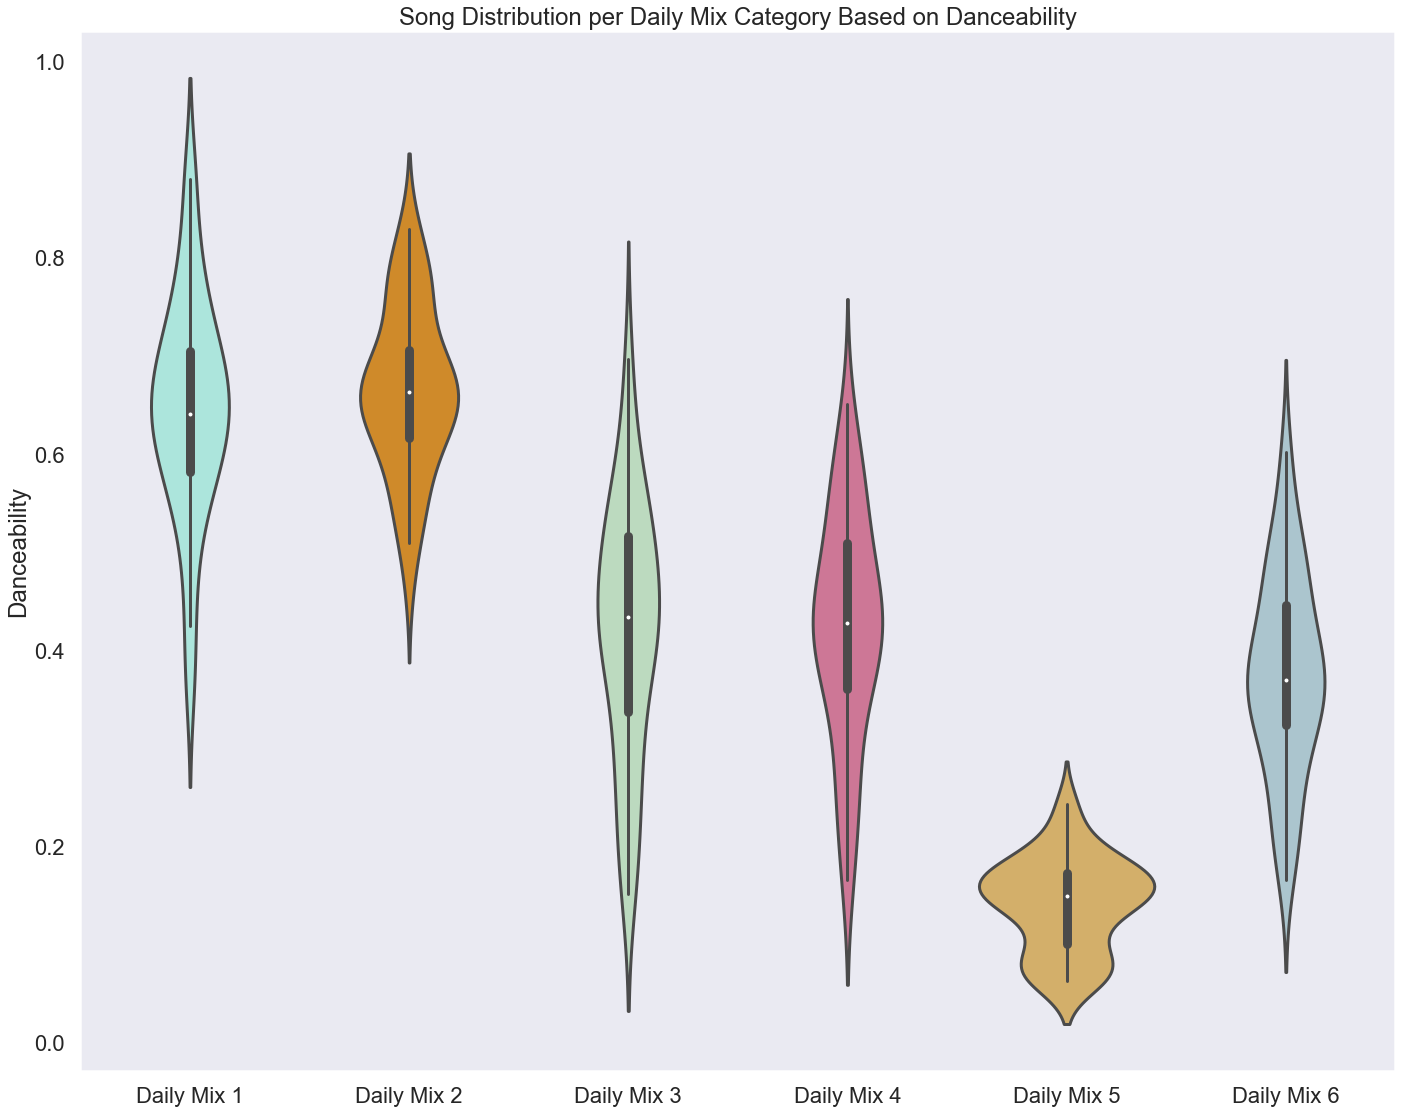

Danceability
Min: 0.0627
Max: 0.88


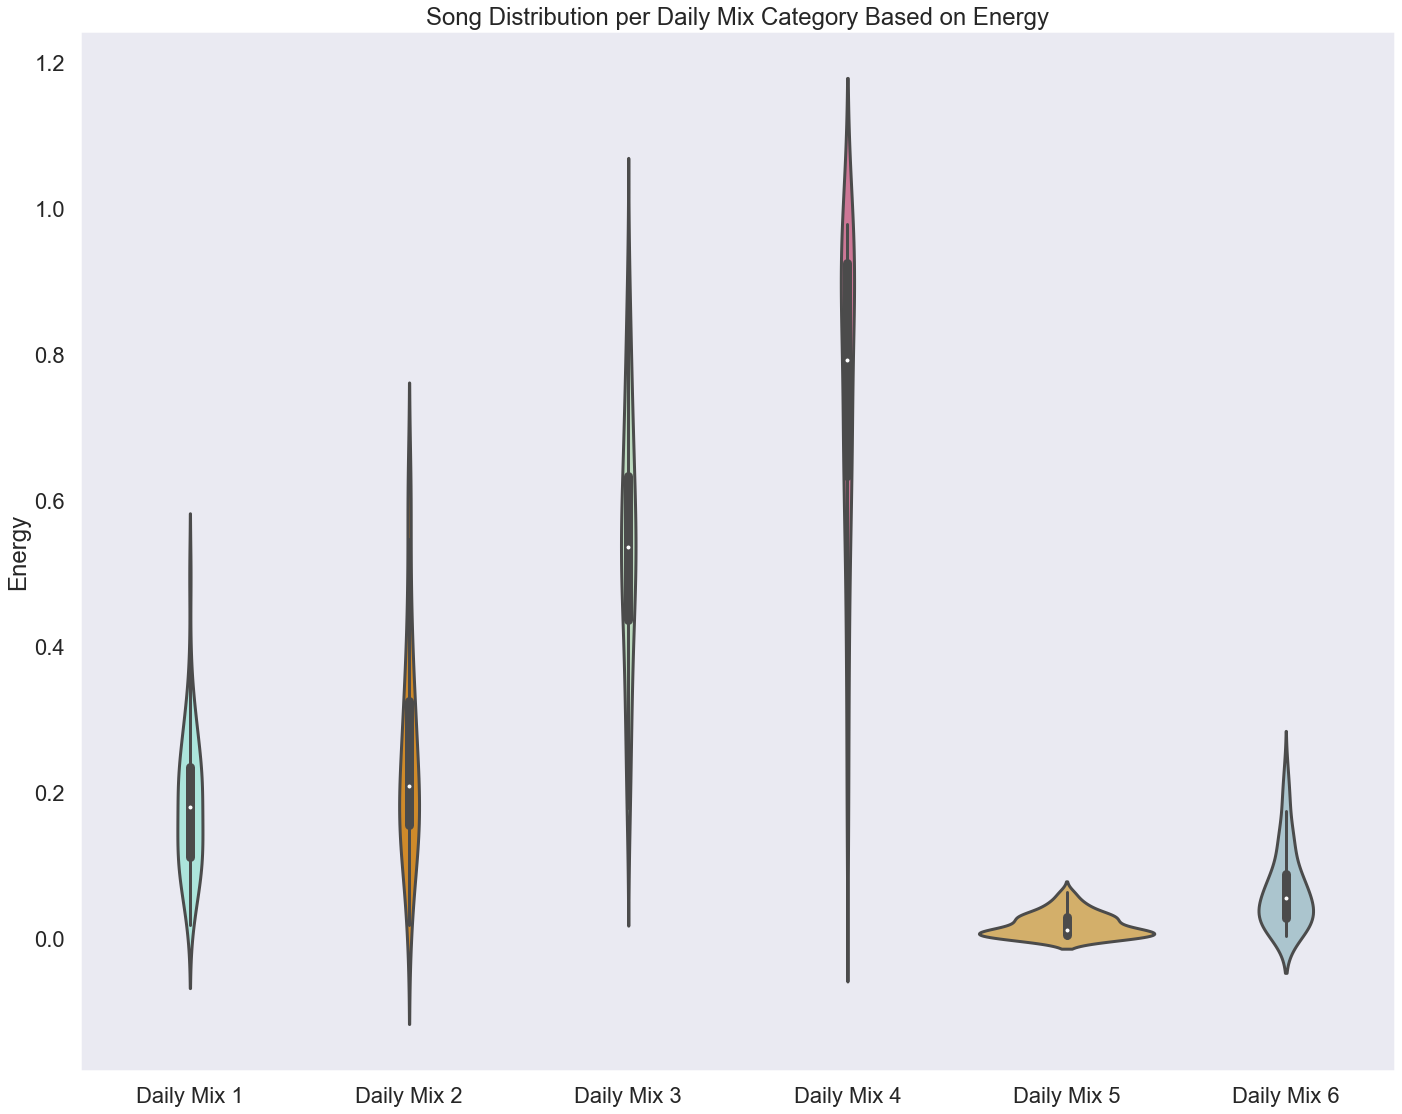

Energy
Min: 0.00166
Max: 0.979


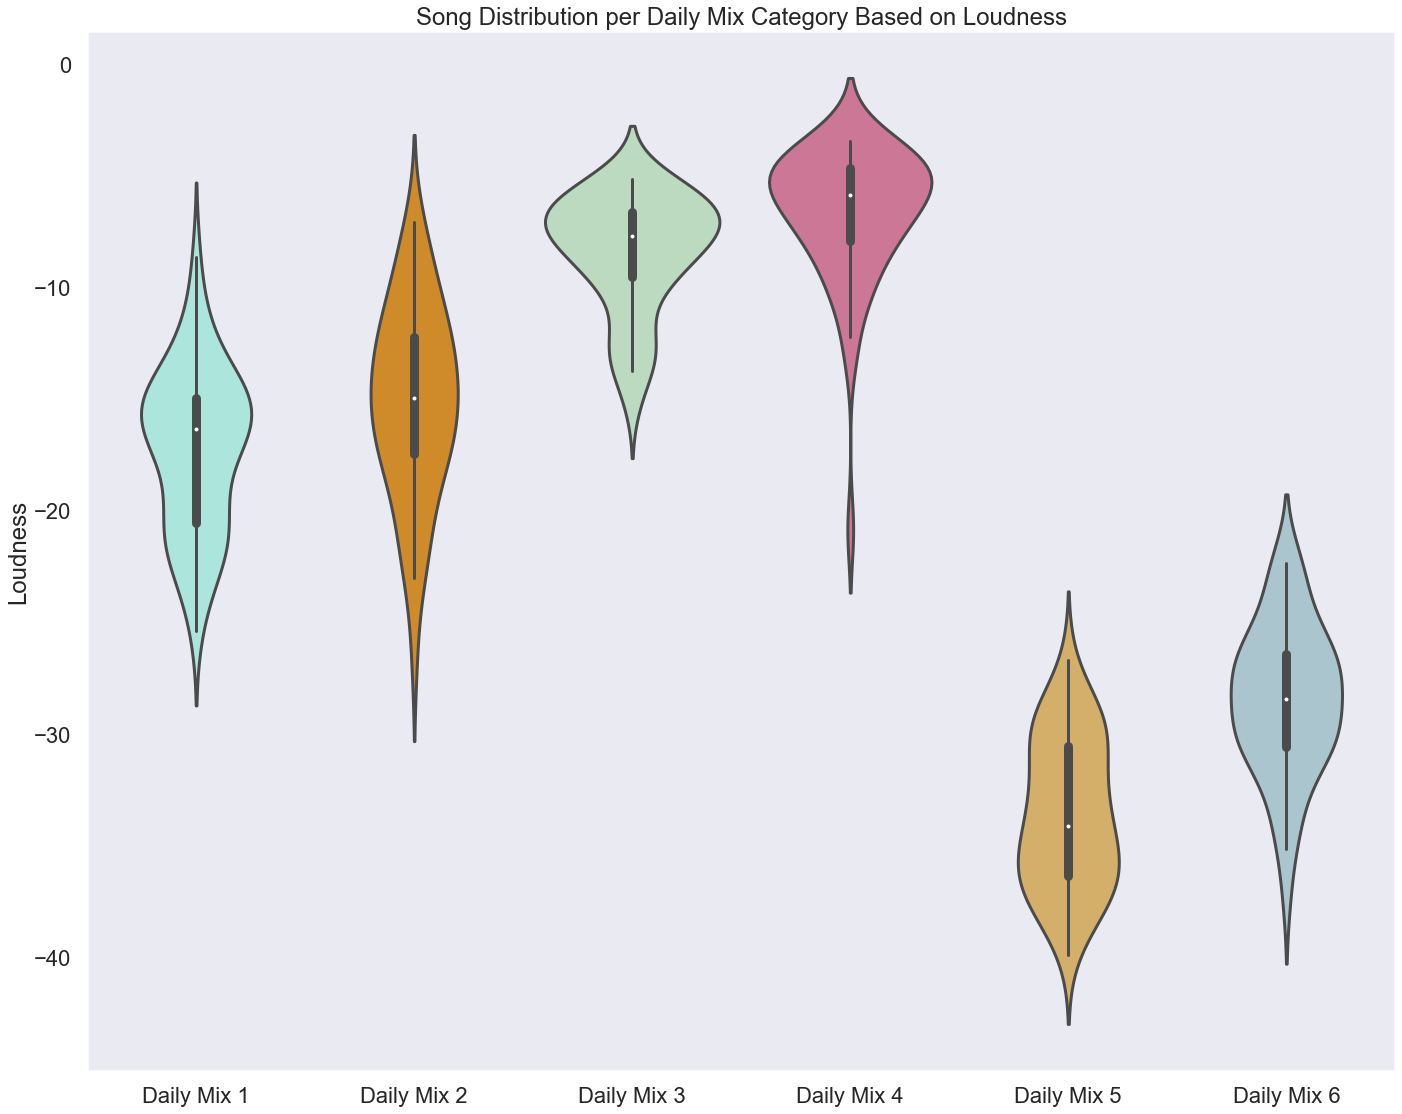

Loudness
Min: -39.904
Max: -3.426


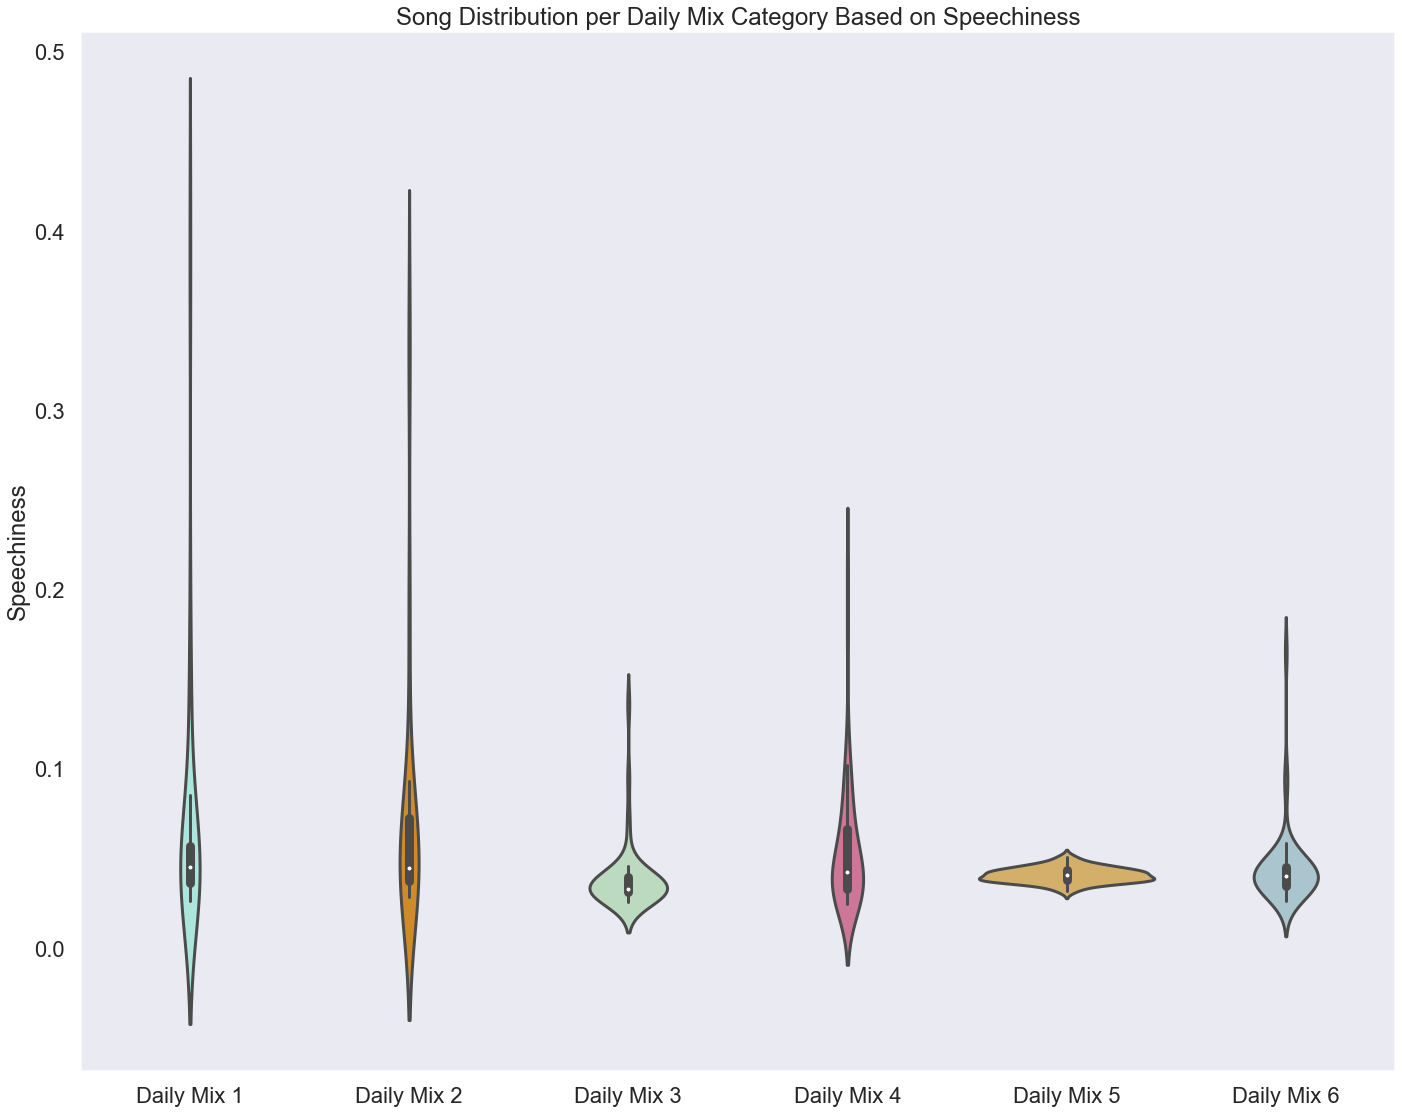

Speechiness
Min: 0.0243
Max: 0.417


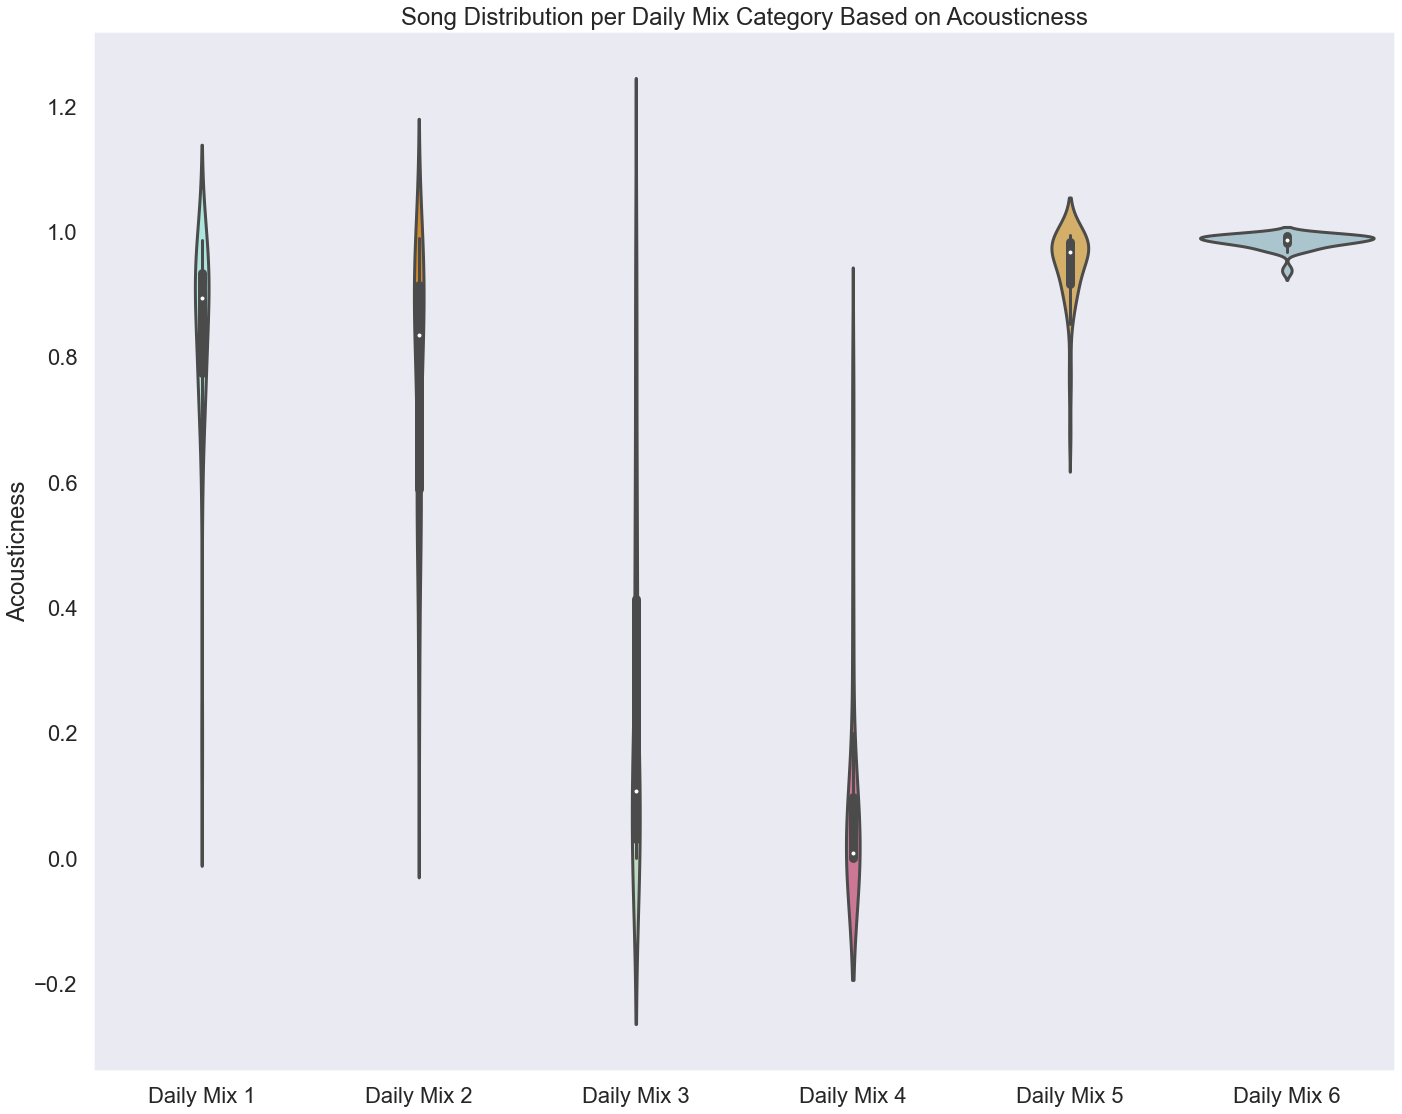

Acousticness
Min: 1.23e-05
Max: 0.996


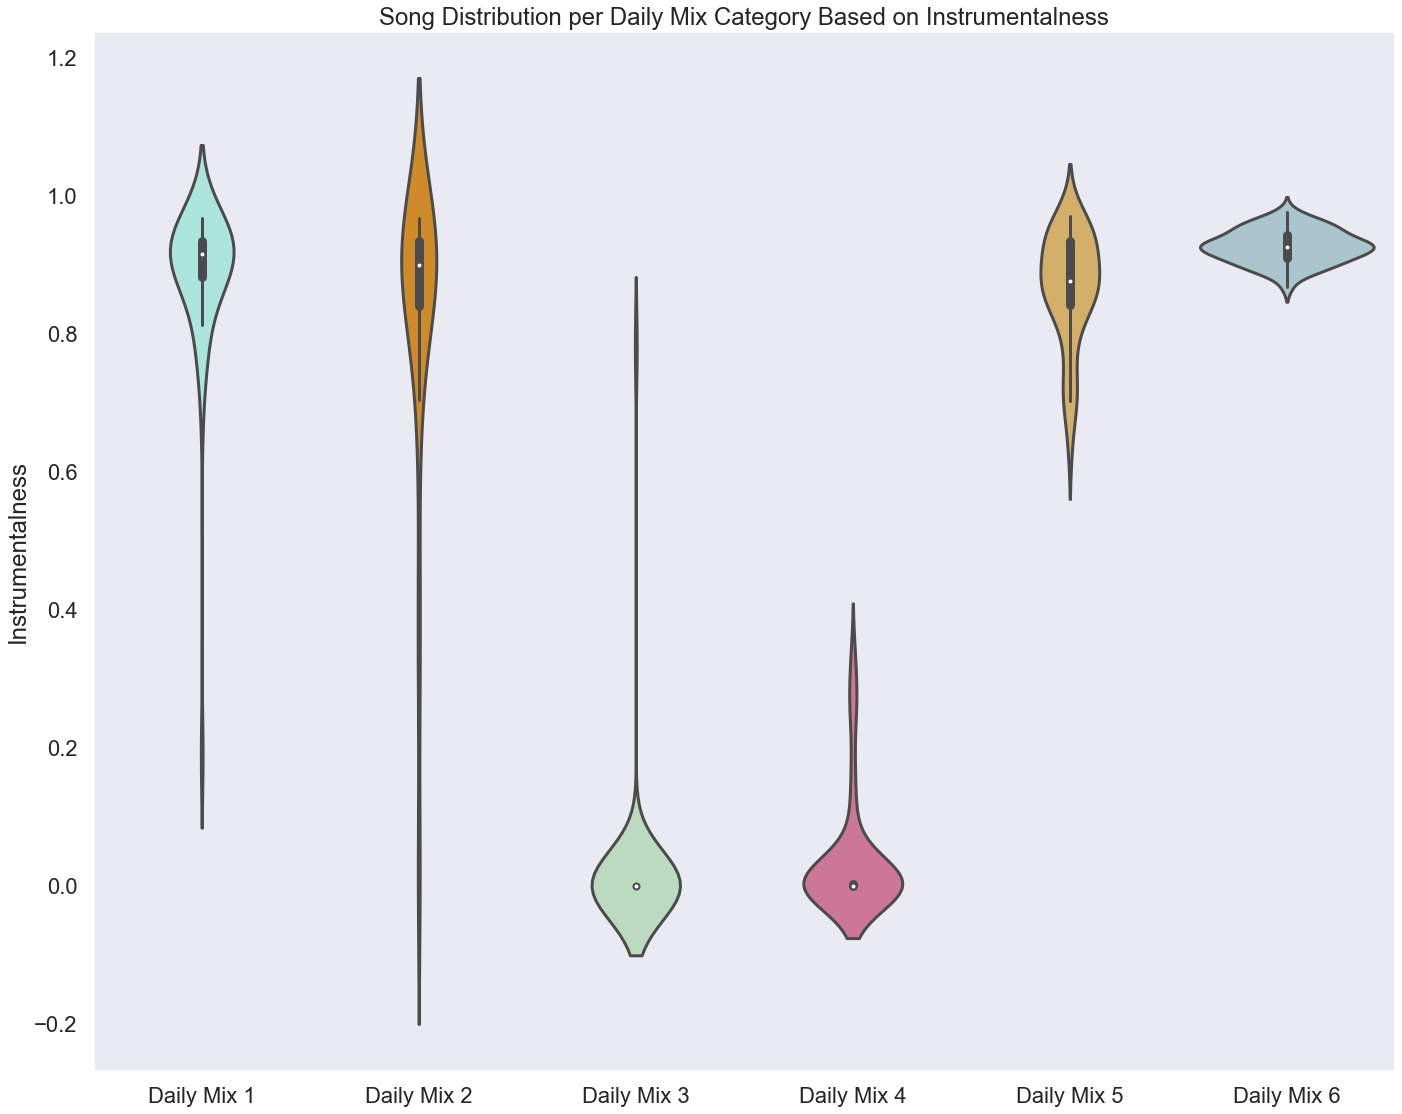

Instrumentalness
Min: 0.0
Max: 0.976


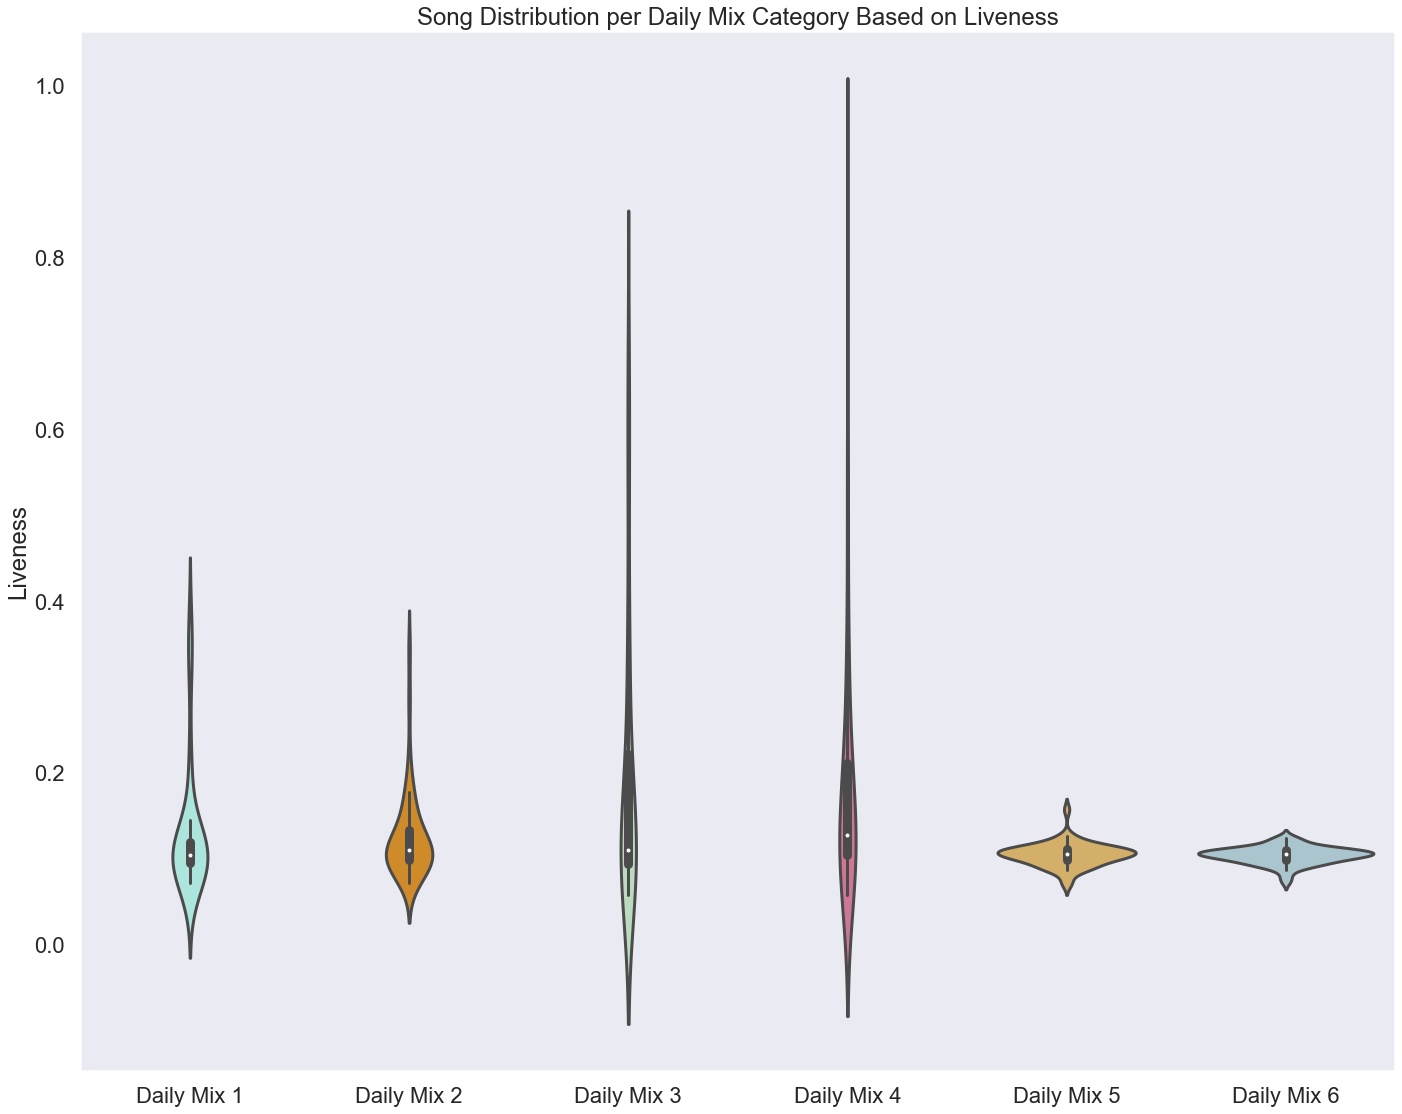

Liveness
Min: 0.056
Max: 0.868


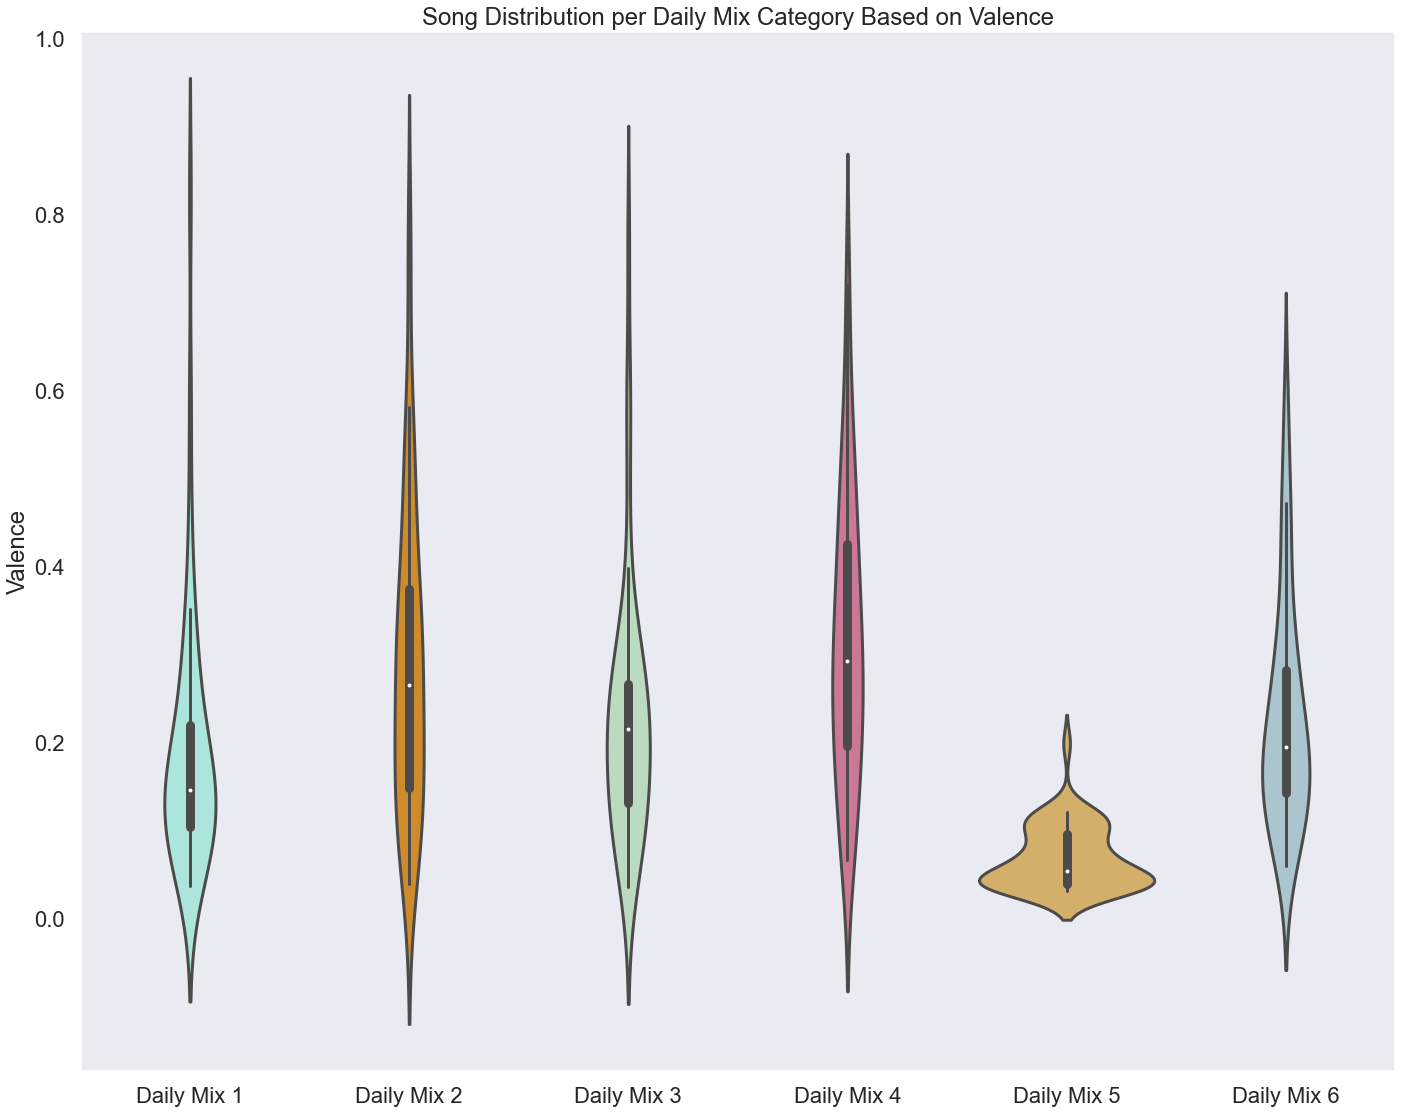

Valence
Min: 0.0313
Max: 0.824


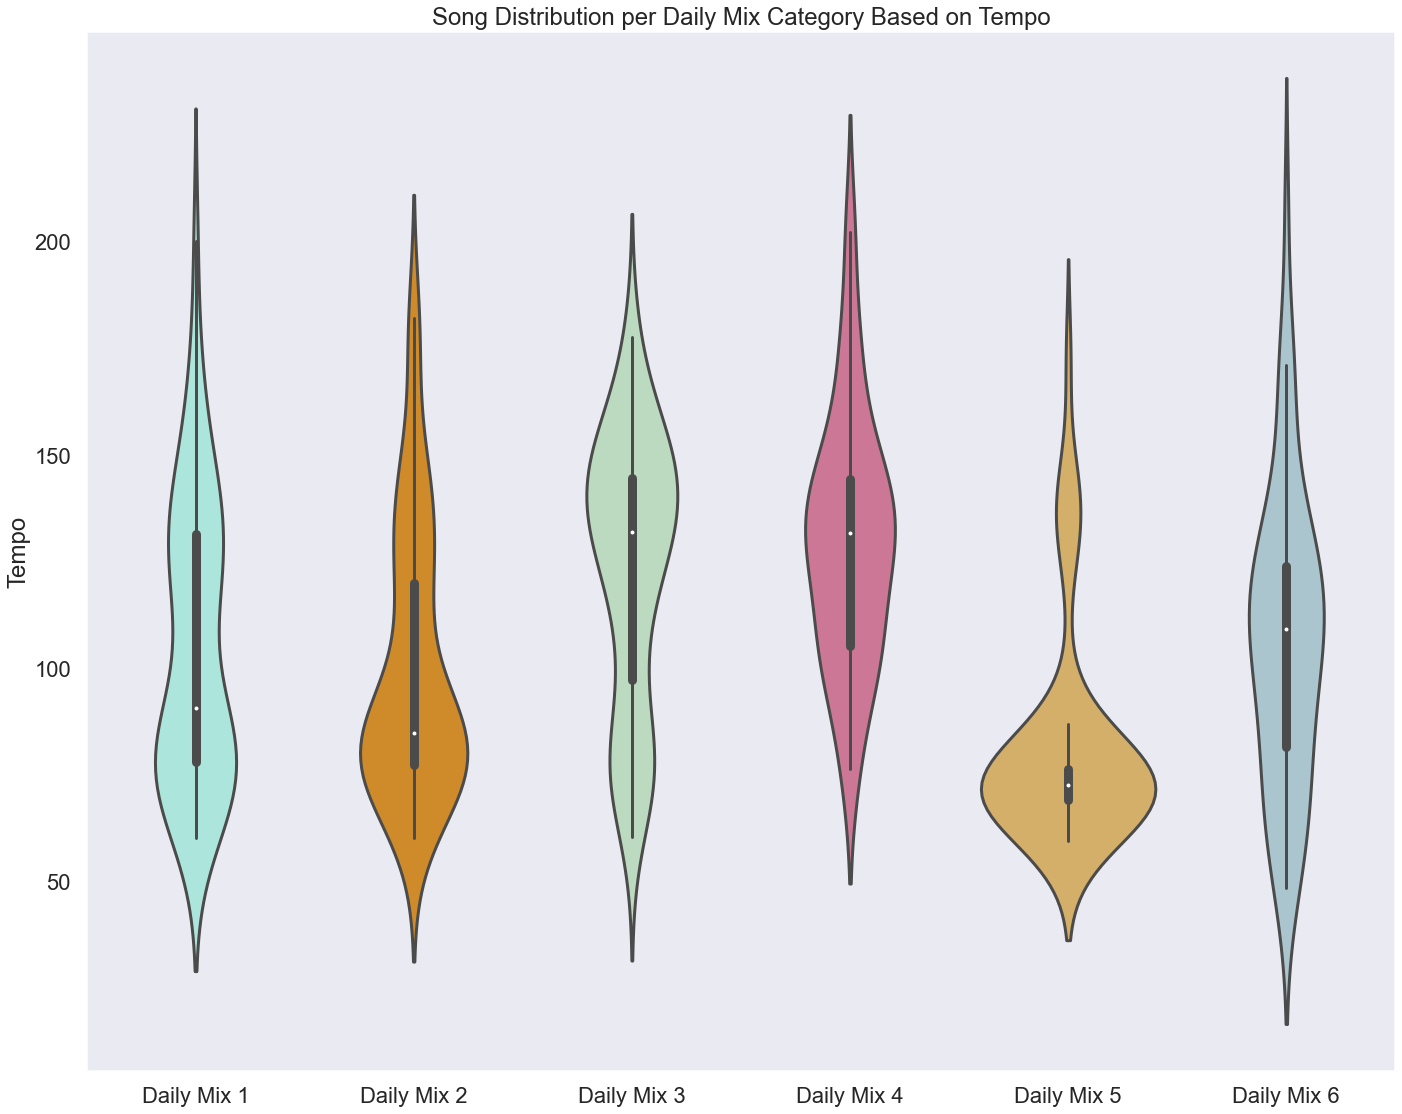

Tempo
Min: 48.37
Max: 206.563


In [274]:
cols = spotify_df.loc[:,'danceability':'tempo'].columns.to_list()
colors = ['#a3eee3', '#ea8e0f', '#b7dfbb', '#db6992', '#e4b459', '#a5c8d4']

for col in cols:
    fig, ax = plt.subplots(figsize=(20, 16))
    ax = sns.violinplot(x='source', y=col, data=spotify_df, palette=colors)
    plt.title(f'Song Distribution per Daily Mix Category Based on {col.title()}')
    plt.ylabel(col.title())
    plt.xlabel(None)
    plt.tight_layout()
    plt.show()
    print('{}\nMin: {}\nMax: {}'.format(col.title(), min(spotify_df[col]), max(spotify_df[col])))

## Visualize Research Year

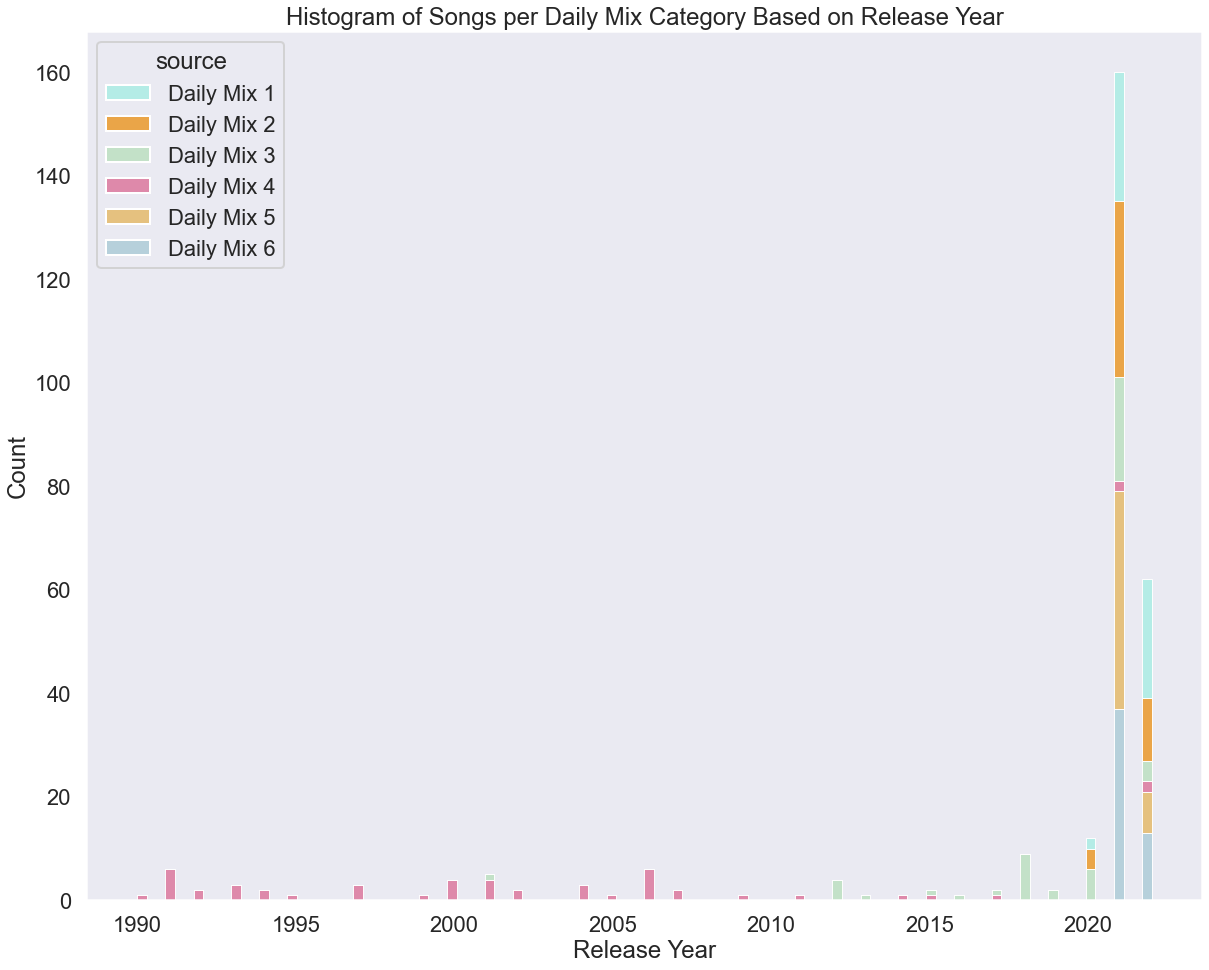

In [324]:
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.histplot(x=spotify_df['album_release_date'].dt.year, palette=colors, hue=spotify_df['source'], multiple='stack')
plt.title('Histogram of Songs per Daily Mix Category Based on Release Year')
plt.xlabel('Release Year')
plt.show()

## Visualize Song Count by Artist

In [208]:
sources = list(spotify_df['source'].unique())

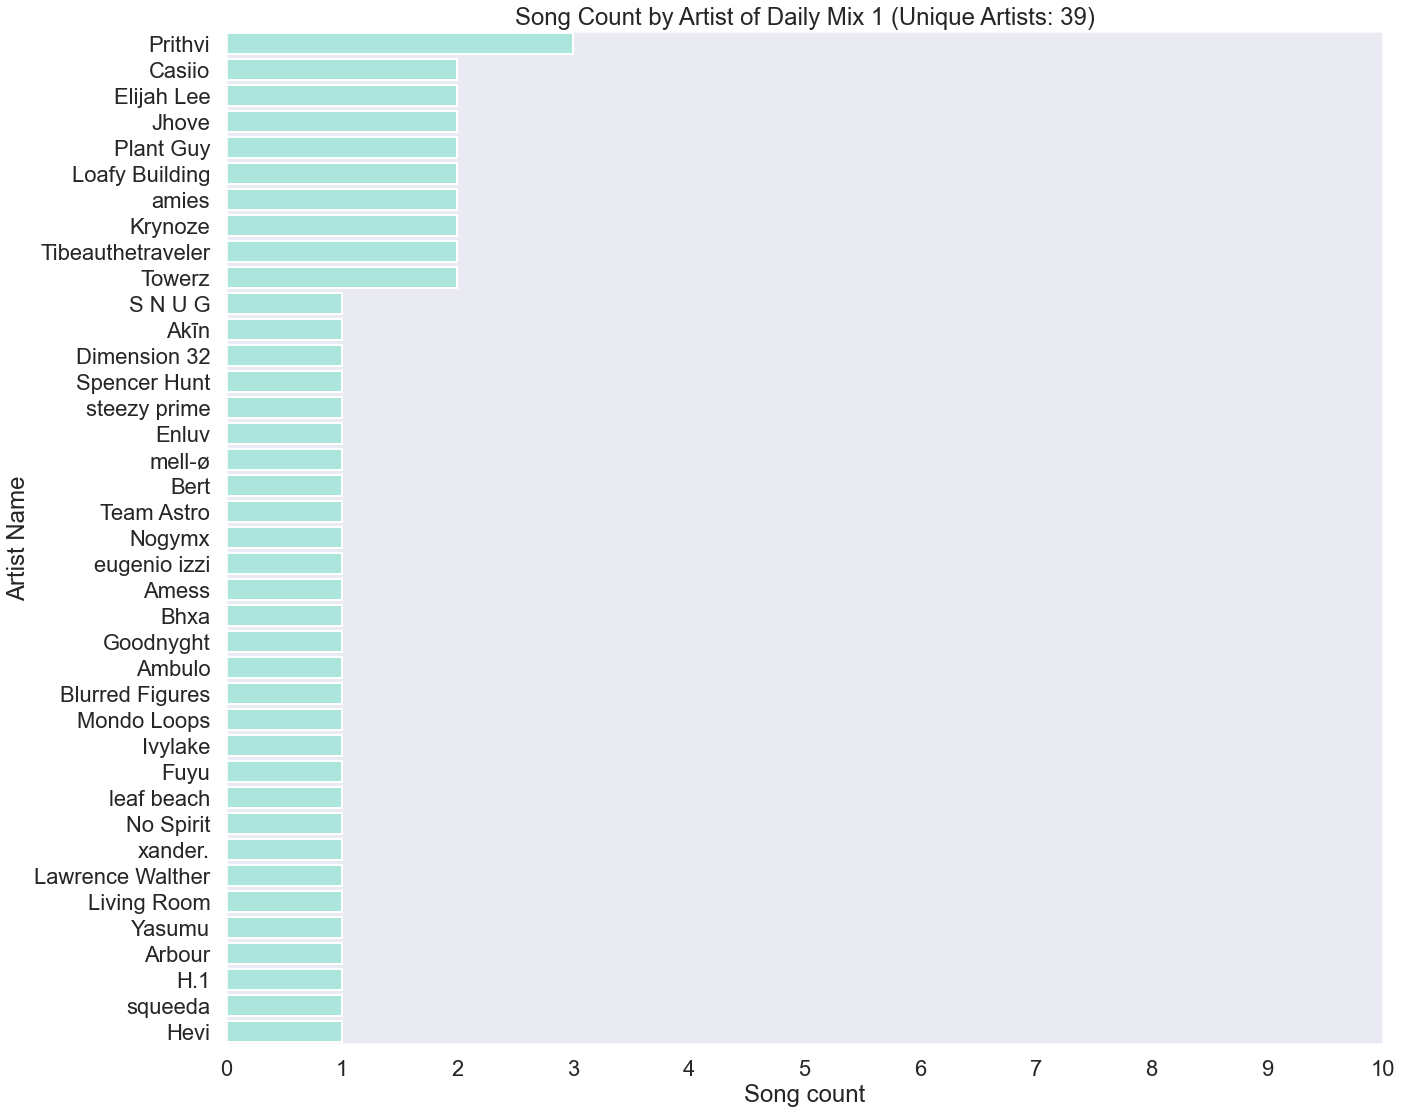

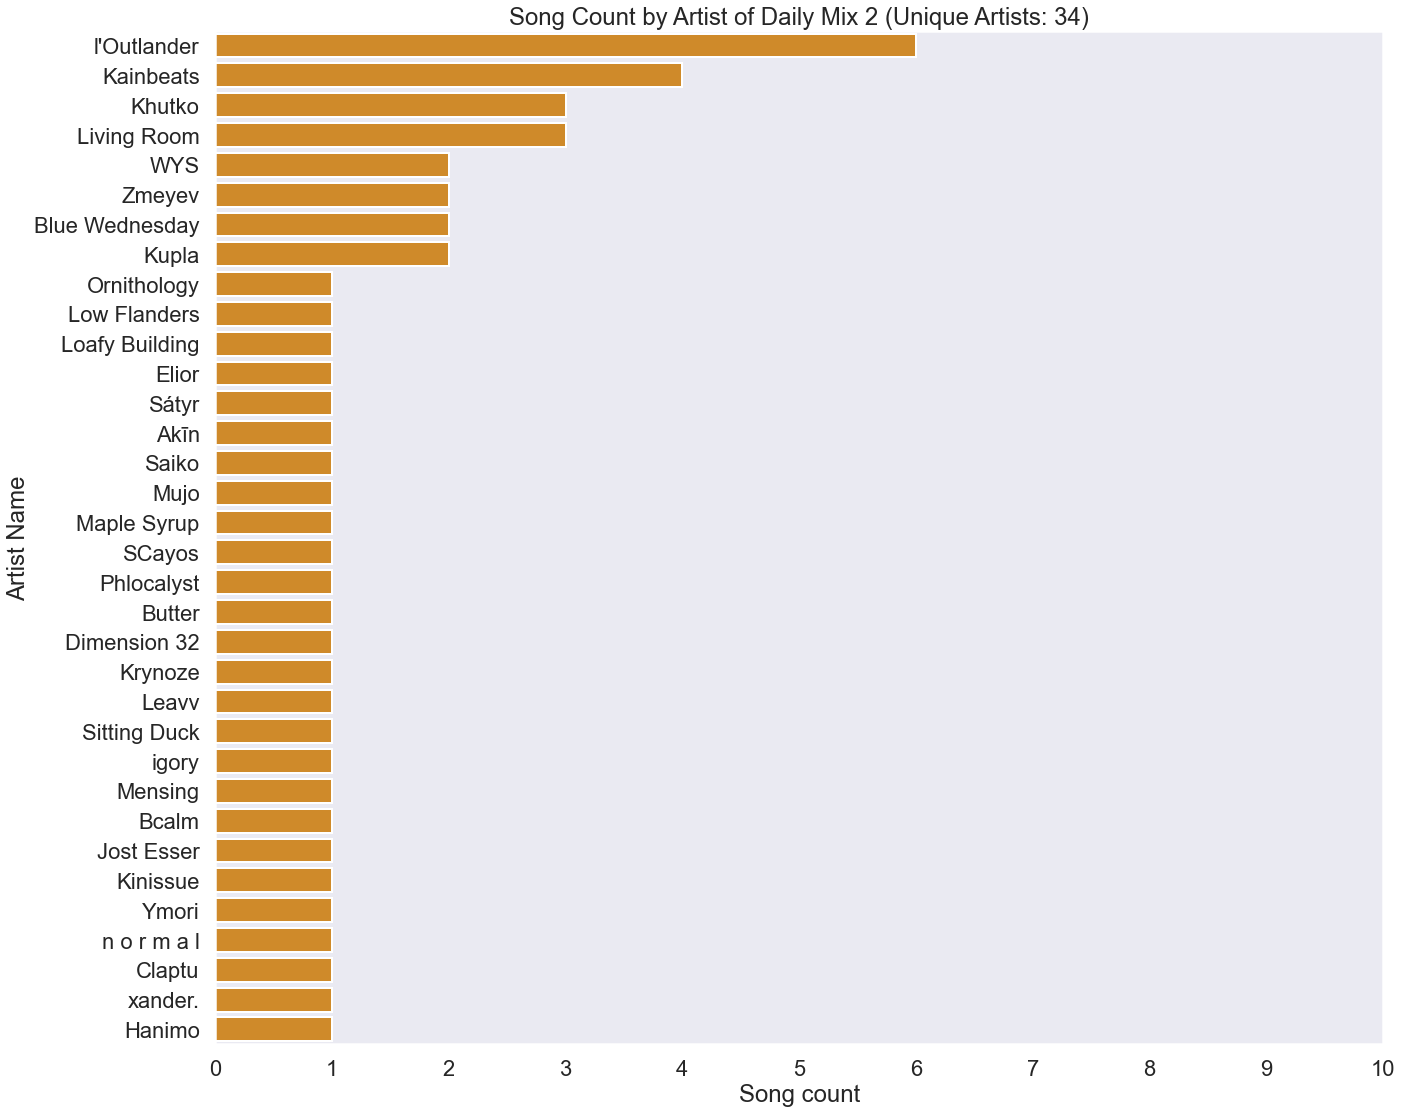

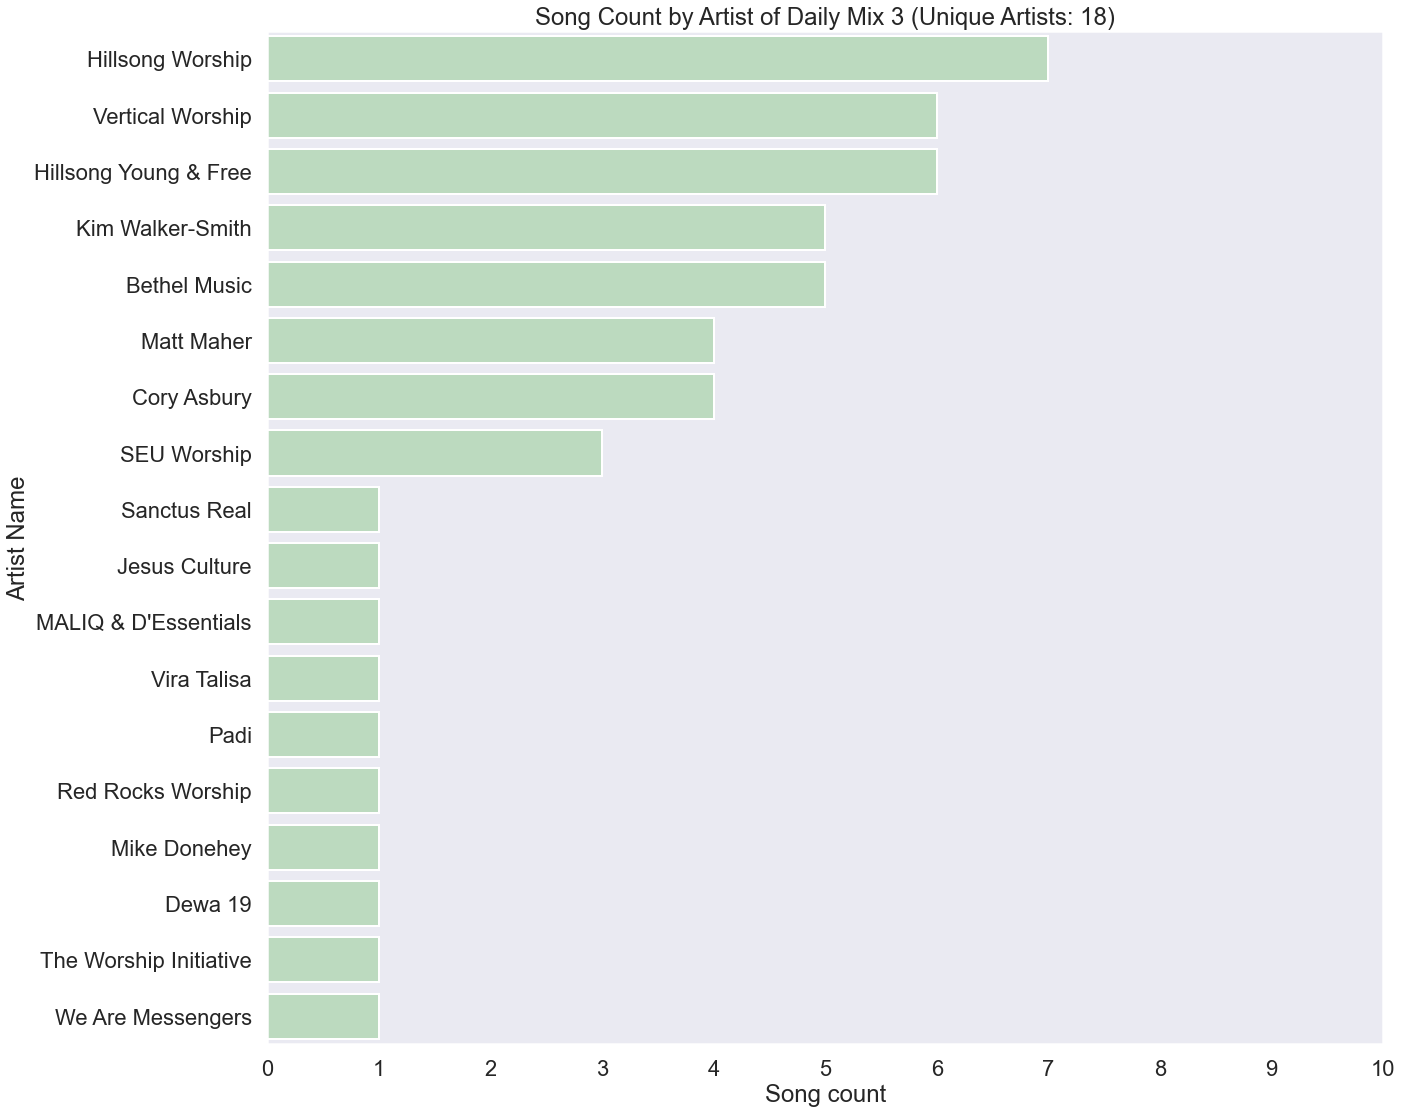

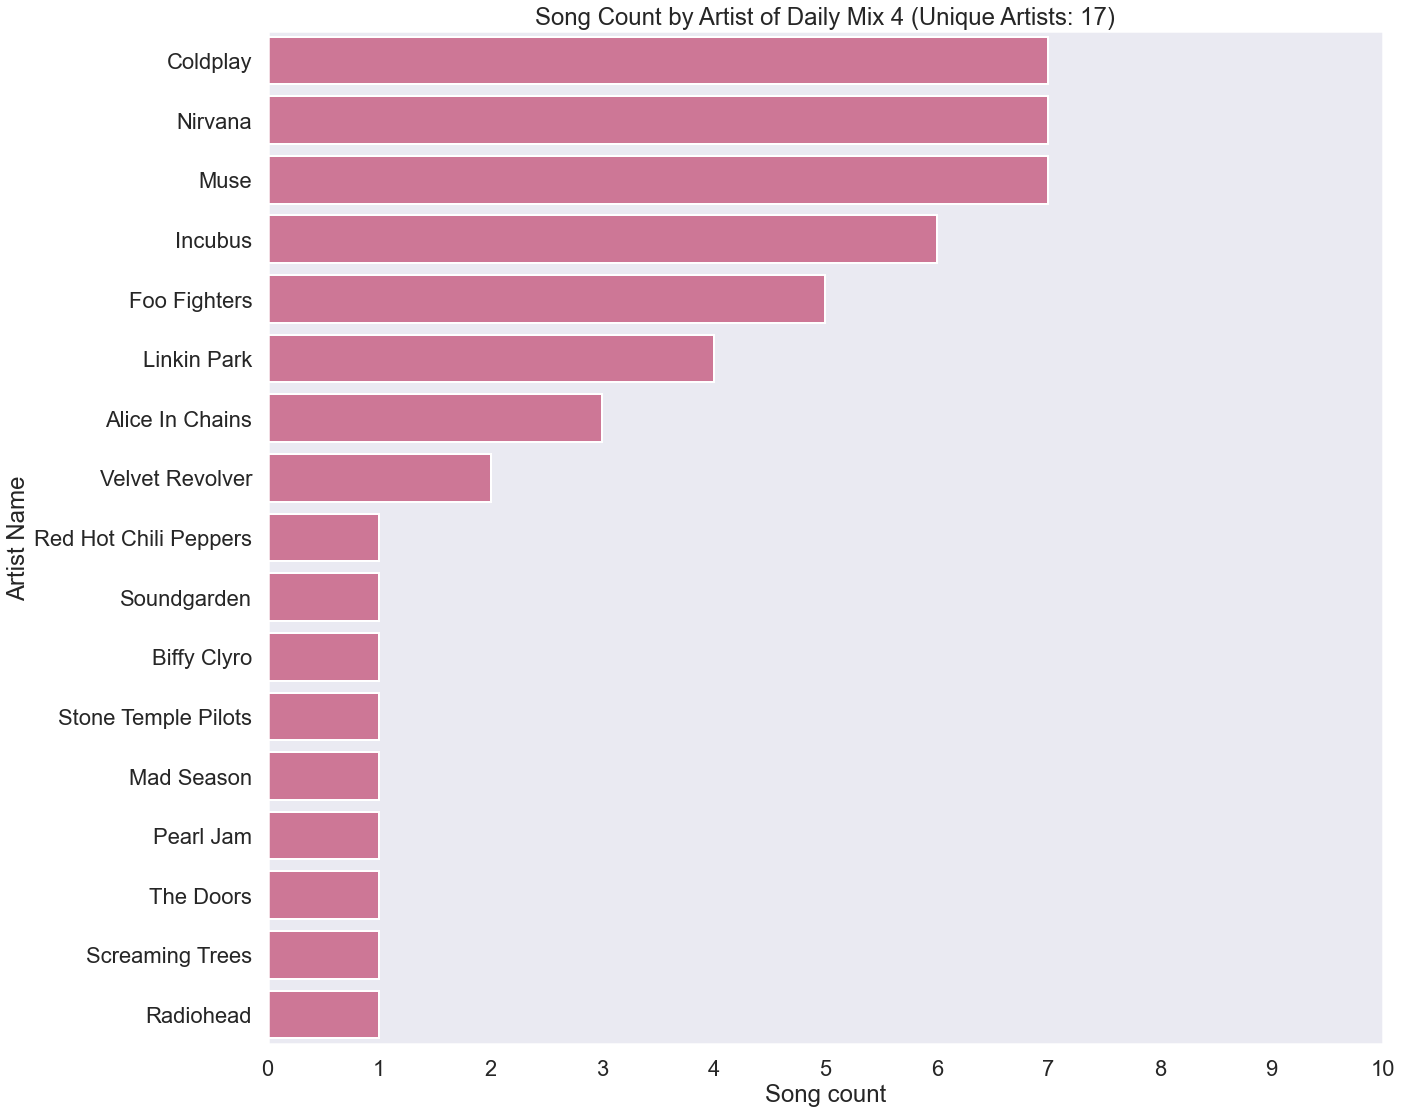

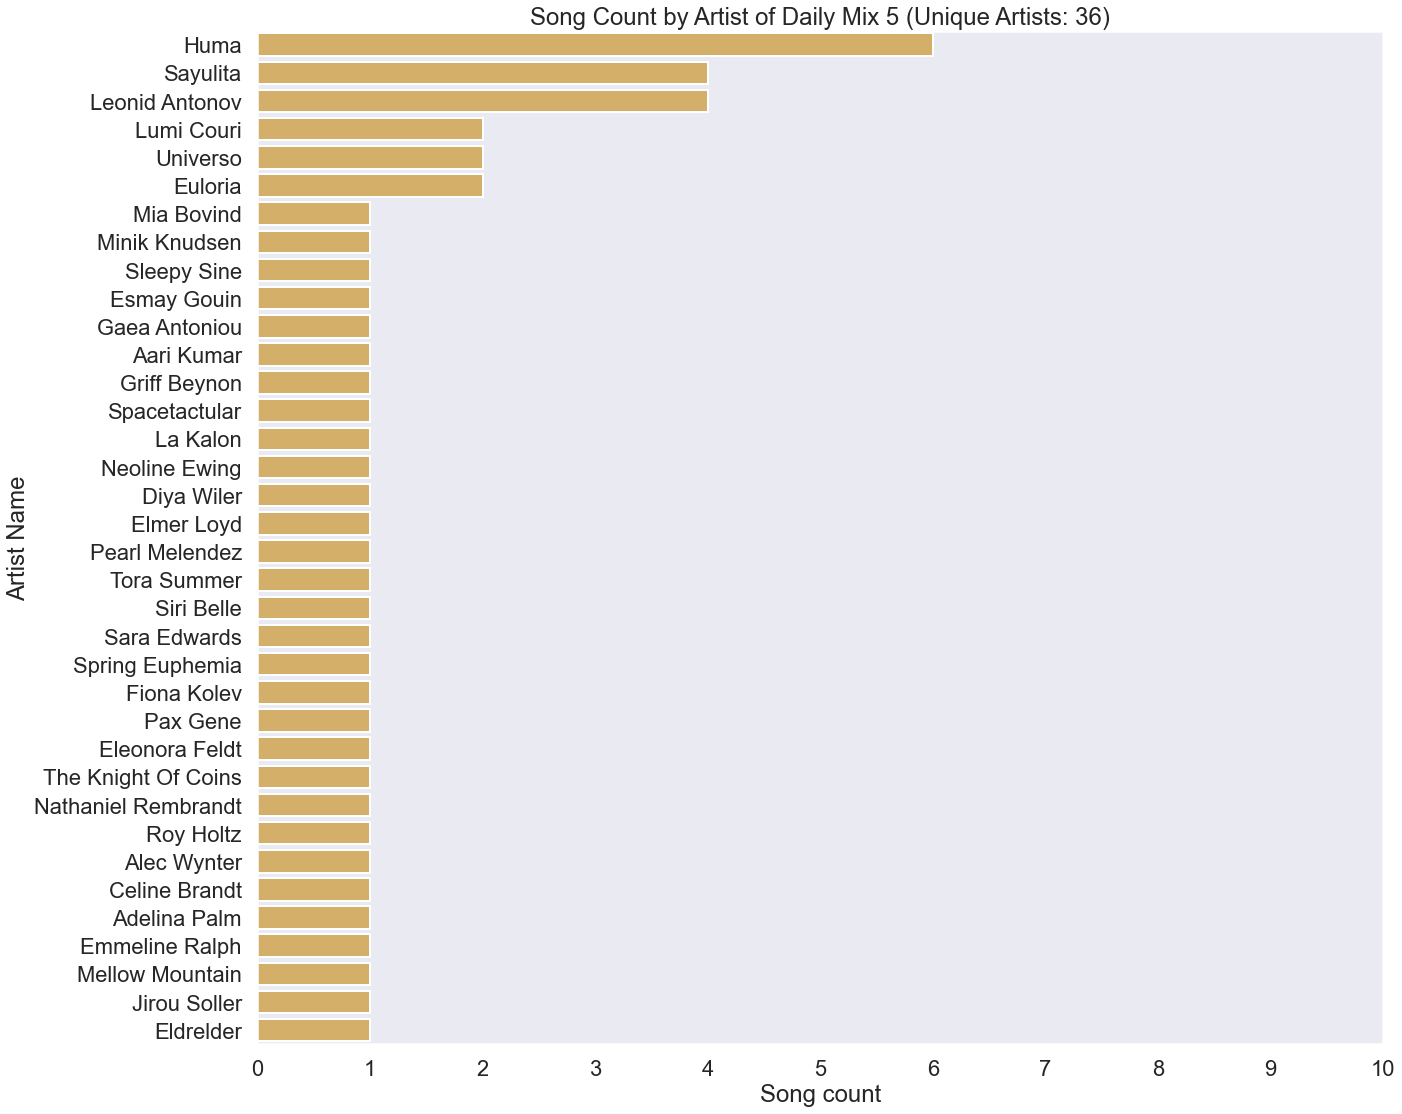

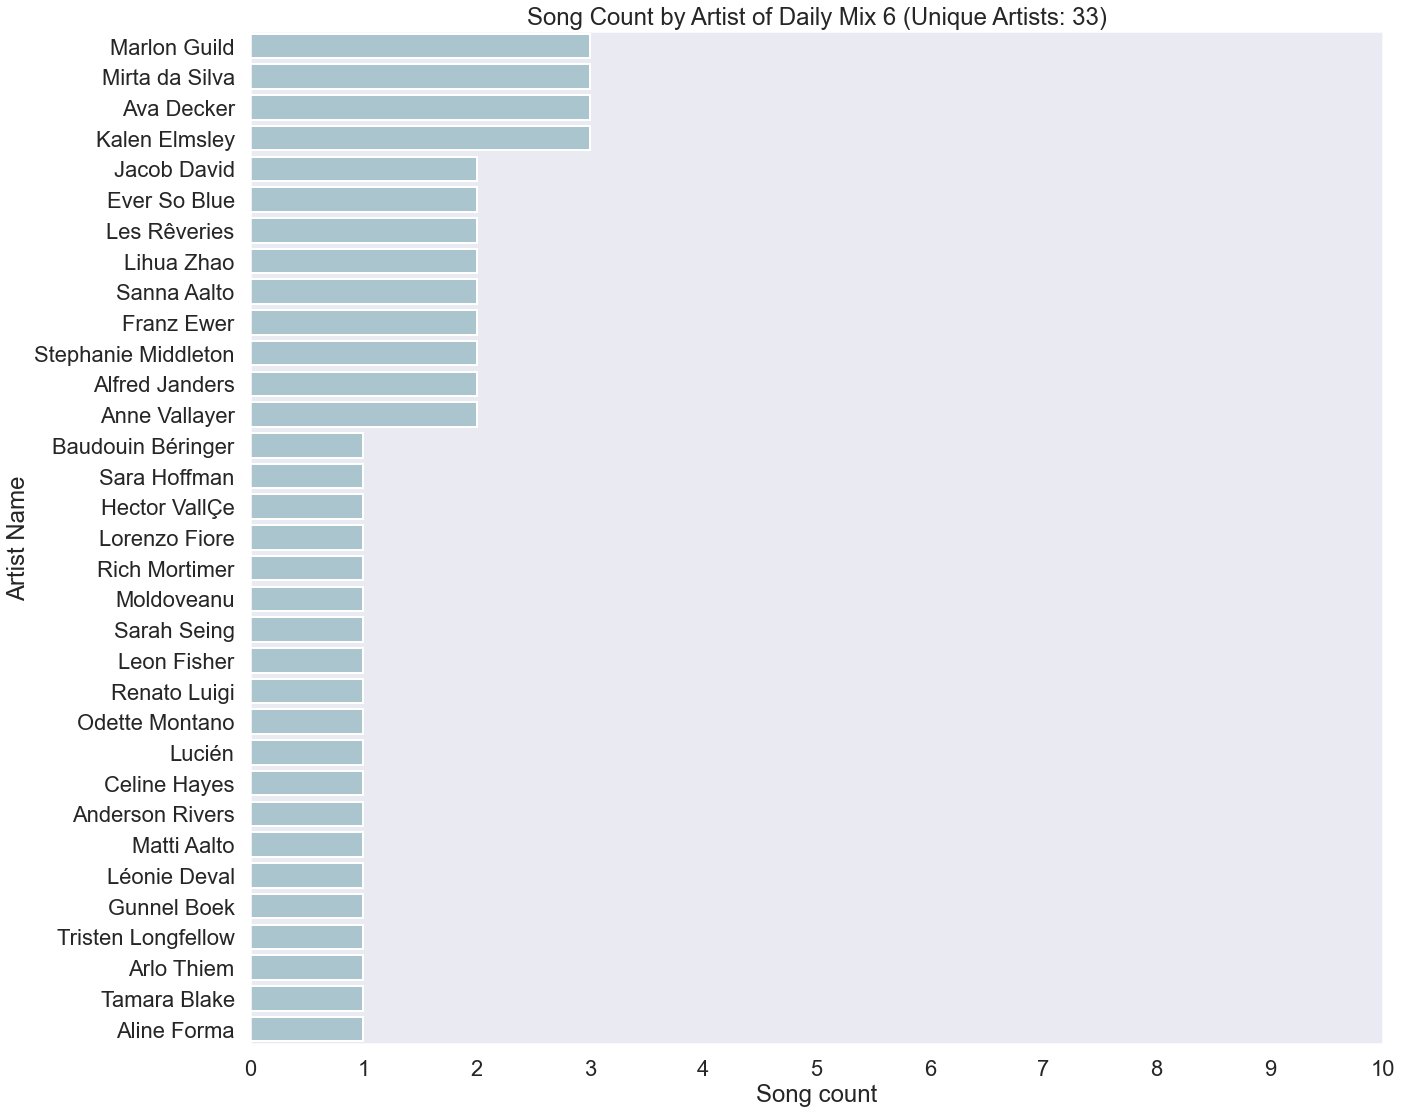

In [321]:
for i, source in enumerate(sources):
    data = spotify_df[spotify_df['source'] == source]
    fig, ax = plt.subplots(figsize=(20, 16))
    ax = sns.countplot(y='artist_name', data=data, color=colors[i], order=data['artist_name'].value_counts().index)
    ax.xaxis.set_ticks(np.arange(0, 11, 1))
    plt.title('Song Count by Artist of {} (Unique Artists: {})'.format(source, data['artist_name'].nunique()))
    plt.xlabel('Song count')
    plt.ylabel('Artist Name')
    plt.tight_layout()
    plt.show()